# Load data

In [1]:
from google.oauth2 import service_account
import pandas as pd
# from pandas.io import gbq #bigquery
import pandas_gbq

In [2]:
def load_with_bigquery(query):
    # Path to your service account key file
    key_path = 'autonomous-gist-424810-j8-e0defe13106a.json'

    # Set up authentication using the service account key file
    credentials = service_account.Credentials.from_service_account_file(key_path)

    try:
        return pandas_gbq.read_gbq(query, project_id='autonomous-gist-424810-j8', credentials=credentials) #'sacred-alpha-421505'
    except:
        print('Error reading the dataset')

In [17]:
def load_with_bigquery_chord():
    query = """
        SELECT *
        FROM (
            SELECT * FROM `filtered_data.patient_flow_linkID` --`full_data.patient_flow_no_locs` --`test_data.patient_flow` 
            WHERE value > 200 
            ORDER BY value DESC
            )
        """
    return load_with_bigquery(query)

In [19]:
data = load_with_bigquery_chord()
data.head()

Downloading: 100%|██████████████████████████████████████████████████████|


,source,target,value,link_index
0,Emergency Department,Medicine,62788,345
1,Emergency Department,Emergency Department Observation,43329,341
2,Emergency Department,Med/Surg,16857,339
3,Emergency Department,Medicine/Cardiology,12708,355
4,Emergency Department,Neurology,10949,354


In [21]:
query = """
        SELECT * FROM `filtered_data.link_index_cat`
        """
linkID_cat = load_with_bigquery(query)
linkID_cat.head()

Downloading: 100%|██████████████████████████████████████████████████████|


,link_index,source,target,source_category,target_category
0,22,PACU,Cardiology,Supportive Care and Recovery,Other
1,26,PACU,Thoracic Surgery,Supportive Care and Recovery,Other
2,816,Med/Surg,Thoracic Surgery,General Medicine,Other
3,664,Med/Surg,Unknown,General Medicine,Other
4,88,Medicine,Unknown,General Medicine,Other


# Example 2: Query a table with BigQuery DataFrames

In [ ]:
df = bf.read_gbq("autonomous-gist-424810-j8.Group2.table1") #this variable is set based on the dataset you chose to query

In [30]:
link_id_cat = linkID_cat[(linkID_cat['source_category']=='Cardiac Care') & (linkID_cat['target_category']=='Cardiac Care')]
filtered_data = data[data['link_index'].isin(link_id_cat['link_index'])]
filtered_data.head()

,source,target,value,link_index
10,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Surgery,7033,528
19,Coronary Care Unit (CCU),Medicine/Cardiology,4420,378
36,Cardiac Vascular Intensive Care Unit (CVICU),Cardiology Surgery Intermediate,1978,533
46,Medicine/Cardiology,Coronary Care Unit (CCU),1600,292
82,Cardiac Surgery,Cardiac Vascular Intensive Care Unit (CVICU),887,199


In [61]:
edges = pd.DataFrame({'source': [node_index[from_] for from_ in filtered_data['source']],
                     'target': [node_index[to_] for to_ in filtered_data['target']],
                     'value': filtered_data['value']})
# edges = filtered_data[['source','target','value']]
edges

,source,target,value
10,5,2,7033
19,0,1,4420
36,5,3,1978
46,1,0,1600
82,2,5,887
101,0,4,670
102,1,5,669
119,5,1,510
149,2,1,393
164,5,0,359


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
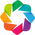

:Chord   [source,target]   (value)

In [63]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
from holoviews import opts,dim
import random

# Convert transitions to a DataFrame and count occurrences
# transition_df = pd.DataFrame(transitions, columns=['from', 'to'])
# transition_counts = transition_df.value_counts().reset_index(name='count')

# Create Chord Diagram using holoviews
hv.extension('bokeh')

# Create a list of nodes (unique careunits)
# nodes = list(set(transition_df['from']).union(set(transition_df['to'])))
nodes = list(set(filtered_data['source']).union(set(filtered_data['target'])))
# Create a dictionary for nodes index
node_index = {node: i for i, node in enumerate(nodes)}

random.seed(5)
node_colors = {node: '#'+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for node in nodes}

# Convert the DataFrame to a format suitable for hvplot Chord
# edges = [(node_index[from_], node_index[to_], count) for from_, to_, count in filtered_data[['source','target','value']].itertuples(index=False)]
edges = pd.DataFrame({'source': [node_index[from_] for from_ in filtered_data['source']],
                     'target': [node_index[to_] for to_ in filtered_data['target']],
                     'value': filtered_data['value']})

# Define nodes in the format required by holoviews
nodes_hv = hv.Dataset(pd.DataFrame({'index': list(range(len(nodes))), 'name': nodes, 'color': [node_colors[node] for node in nodes]}), 'index')

# Create the Chord diagram
# chord = hv.Chord((edges, nodes_hv)).select(value=(5,None))
chord = hv.Chord((edges, nodes_hv)).opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(),
               labels='name', node_color=dim('index').str(), height=600, width=600, title="Careunit Transition Chord Diagram")
)

# Display the Chord diagram
chord


In [71]:
# Aggregate values for each node
# node_values = filtered_data.groupby('source')['value'].sum() + filtered_data.groupby('target')['value'].sum()
node_values = filtered_data.sort_values(by='value',ascending=False)
node_values.set_index('value',inplace=True)
# Create a list of sorted nodes
nodes = node_values.index.tolist()

print(node_values, nodes)

                                             source  \
value                                                 
7033   Cardiac Vascular Intensive Care Unit (CVICU)   
4420                       Coronary Care Unit (CCU)   
1978   Cardiac Vascular Intensive Care Unit (CVICU)   
1600                            Medicine/Cardiology   
887                                 Cardiac Surgery   
670                        Coronary Care Unit (CCU)   
669                             Medicine/Cardiology   
510    Cardiac Vascular Intensive Care Unit (CVICU)   
393                                 Cardiac Surgery   
359    Cardiac Vascular Intensive Care Unit (CVICU)   
358                Medicine/Cardiology Intermediate   
299                        Coronary Care Unit (CCU)   
273                        Coronary Care Unit (CCU)   
273                Medicine/Cardiology Intermediate   

                                             target  link_index  
value                                                

In [78]:
nodes = list(set(filtered_data['source']).union(set(filtered_data['target'])))

node_values = filtered_data.groupby('source')['value'].sum() + filtered_data.groupby('target')['value'].sum()
node_values = node_values.sort_values(ascending=False)

# Create a list of sorted nodes
nodes = node_values.index.tolist()
nodes

['Cardiac Vascular Intensive Care Unit (CVICU)',
 'Cardiac Surgery',
 'Medicine/Cardiology',
 'Coronary Care Unit (CCU)',
 'Medicine/Cardiology Intermediate',
 'Cardiology Surgery Intermediate']

In [110]:
# pd.Series.reset_index(data2.groupby('target')['num'].sum(), inplace=True)
type(data2.groupby('target')['value'].sum())

pandas.core.series.Series

In [81]:
data2 = data.copy()
data2['num']=1
incoming = pd.DataFrame({'nodes':nodes})
incoming2 = pd.merge(incoming, data2.groupby('target')['num'].sum())
incoming2

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [30]:
%pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.0 MB/s eta 0:00:00


In [33]:
import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import bundle_graph

In [36]:
# Define nodes and edges
nodes_hv = hv.Dataset({'index': list(range(len(nodes))), 'name': nodes}, 'index')
edges_hv = hv.Dataset({'source': [edge[0] for edge in edges],
                       'target': [edge[1] for edge in edges]}, ['source', 'target'])

# Create the Graph object
graph = hv.Graph((edges_hv, nodes_hv))

# Apply edge bundling using hv.bundle_graph
bundled_graph = bundle_graph(graph)

# Customize the appearance
bundled_graph.opts(
    node_size=10,
    node_color='gray',
    edge_color='gray',
    edge_alpha=0.3,
    width=800,
    height=800,
    bgcolor='white',
    show_frame=False,
    xaxis=None,
    yaxis=None,
    title="Hierarchical Edge Bundling"
)

# Display the bundled graph
bundled_graph


/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.



:Graph   [source,target]

In [17]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

df = pd.DataFrame(results)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Chord Diagram"),
    dcc.Dropdown(
        id='gender-dropdown',
        options=[
            {'label': 'Male', 'value': 'M'},
            {'label': 'Female', 'value': 'F'}
        ],
        value='M',
        clearable=False,
        placeholder="Select gender"
    ),
    dcc.Graph(id='chord-diagram')
])

# Define callback to update the Chord Diagram based on dropdown selection
@app.callback(
    Output('chord-diagram', 'figure'),
    [Input('gender-dropdown', 'value')]
)
def update_chord_diagram(selected_gender):
    # Filter the DataFrame based on selected gender
    filtered_df = df[df['gender'] == selected_gender]

    # Ensure the filtered data is sorted by hadm_id and transfer_id
    df_sorted = filtered_df.sort_values(by=['hadm_id', 'transfer_id'])

    # Create a list to store the transitions
    transitions = []

    # Loop through each hadm_id
    for hadm_id, group in df_sorted.groupby('hadm_id'):
        # Get the list of careunits in the order of transfer_id
        careunits = group['careunit'].tolist()

        # Append transitions (from current careunit to next careunit)
        for i in range(len(careunits) - 1):
            transitions.append((careunits[i], careunits[i + 1]))

    # Convert transitions to a DataFrame and count occurrences
    transition_df = pd.DataFrame(transitions, columns=['from', 'to'])
    transition_counts = transition_df.value_counts().reset_index(name='count')

    # Create Chord Diagram
    fig = go.Figure(data=[go.Chord(
        source=transition_counts['from'],  # Source careunit
        target=transition_counts['to'],    # Target careunit
        value=transition_counts['count'],  # Transition count
        colorscale='Viridis',              # Color scale
        hoverinfo='value',                 # Display transition count on hover
    )])

    fig.update_layout(title_text='Careunit Transition Chord Diagram')
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.DataFrame(results)

# hadm_id 내에서 transfer_id로 정렬합니다.
df_sorted = df.sort_values(by=['hadm_id', 'transfer_id'])

# 각 hadm_id별로 careunit의 이동 경로를 나타내는 엣지를 생성합니다.
edges = [(df_sorted.iloc[i]['careunit'], df_sorted.iloc[i + 1]['careunit']) for i in range(len(df_sorted) - 1)]

# 그래프를 생성합니다.
G = nx.DiGraph()
G.add_edges_from(edges)

# 레이아웃을 정의하고, 그래프를 그립니다.
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrows=False)
plt.title('Careunit Transfer Network')
plt.show()
